<a href="https://colab.research.google.com/github/statistical-lies/Multiple-Linear-Regression/blob/main/true_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
#vizuals
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [ ]:
%matplotlib inline

#importing dataset using panda
data=pd.read_excel('/content/maize_production.xlsx')
#to see what my dataset is comprised of
data.head()

,Age (Yrs),Sex,House-Head,Household people,Lev. Edu,N_maize_F,Annual Income (GHC),no. of Bags,Fertilizer
0,51-60,female,no,6-10,JHS/Middle,4,4000,7,yes
1,> 60,male,yes,6-10,JHS/Middle,3,4000,7,yes
2,31-40,female,no,6-10,JHS/Middle,3,4000,3,no
3,> 60,female,no,6-10,no Formal,3,4000,4,no
4,51-60,male,yes,6-10,Vocational,2,4000,8,yes


In [ ]:
#checking for categorical data
print(data.dtypes)


Age (Yrs)              object
Sex                    object
House-Head             object
Household people       object
Lev. Edu               object
N_maize_F               int64
Annual Income (GHC)     int64
no. of Bags             int64
Fertilizer             object
dtype: object


In [ ]:
data.columns

Index(['Age (Yrs)', 'Sex', 'House-Head', 'Household people', 'Lev. Edu',
       'N_maize_F', 'Annual Income (GHC)', 'no. of Bags', 'Fertilizer'],
      dtype='object')

In [ ]:
data.groupby("Fertilizer")['N_maize_F', 'no. of Bags','Annual Income (GHC)'].mean().head()

,N_maize_F,no. of Bags,Annual Income (GHC)
Fertilizer,,,
no,2.81250,6.250000,3518.750000
yes,2.72973,5.918919,3656.756757


In [ ]:
data.describe()

,N_maize_F,Annual Income (GHC),no. of Bags
count,69.000000,69.000000,69.000000
mean,2.768116,3592.753623,6.072464
std,1.164991,702.583225,2.116593
min,1.000000,1600.000000,1.000000
25%,2.000000,2600.000000,4.000000
50%,3.000000,4000.000000,6.000000
75%,3.000000,4000.000000,8.000000
max,6.000000,4000.000000,10.000000


<Axes: >

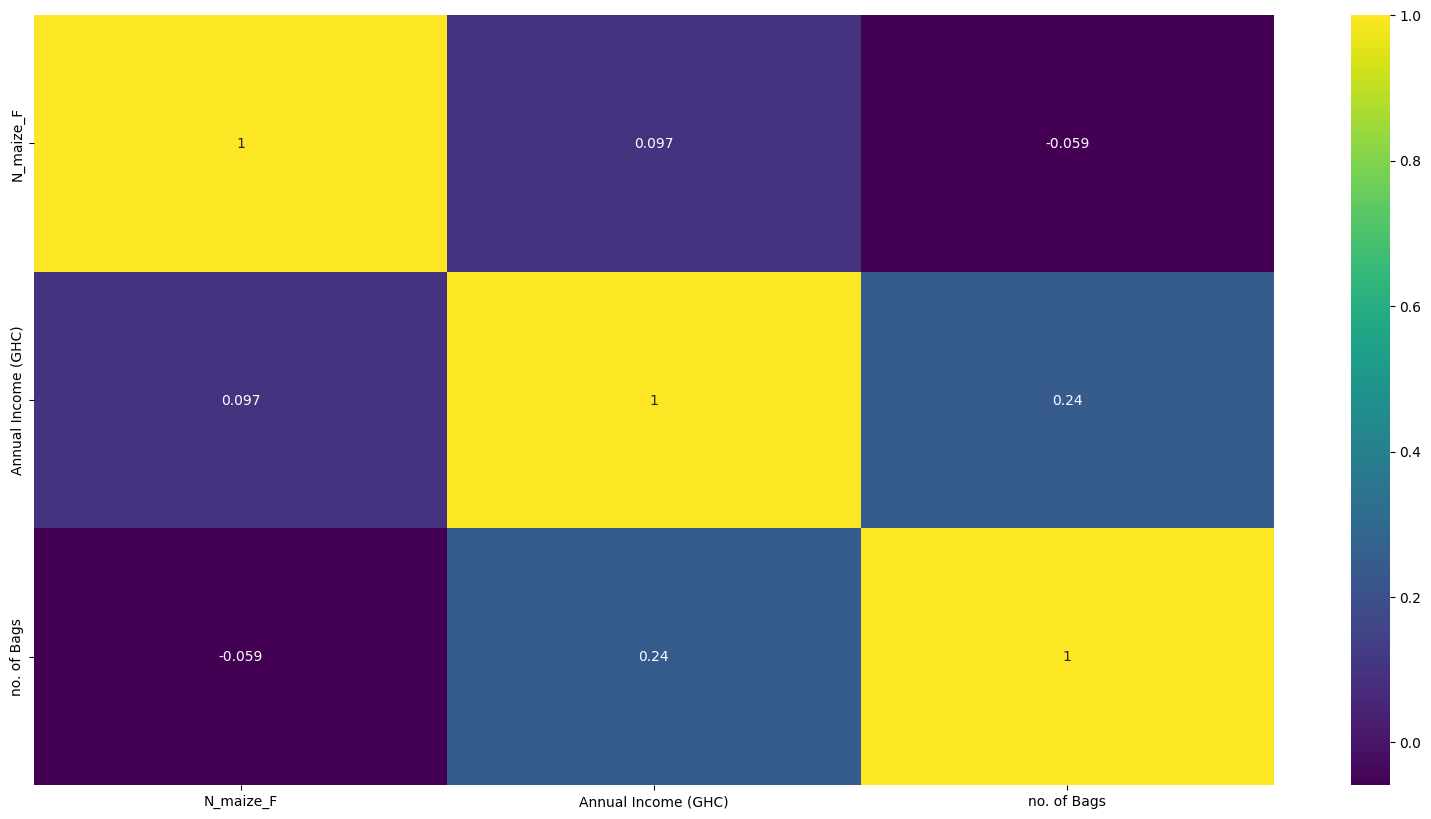

In [ ]:
plt.figure(figsize= (20,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

<Axes: xlabel='N_maize_F', ylabel='Density'>

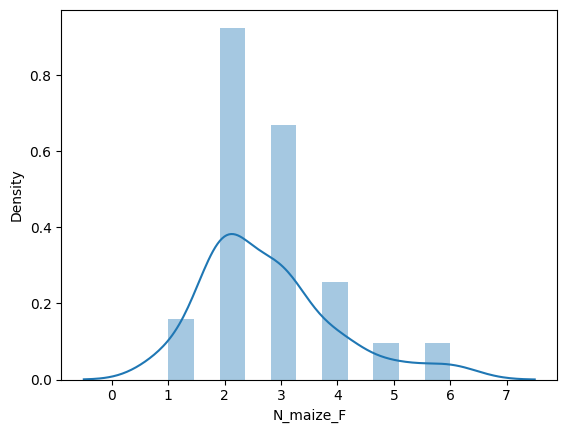

In [ ]:
sns.distplot(data['N_maize_F'])

<Axes: xlabel='no. of Bags', ylabel='Density'>

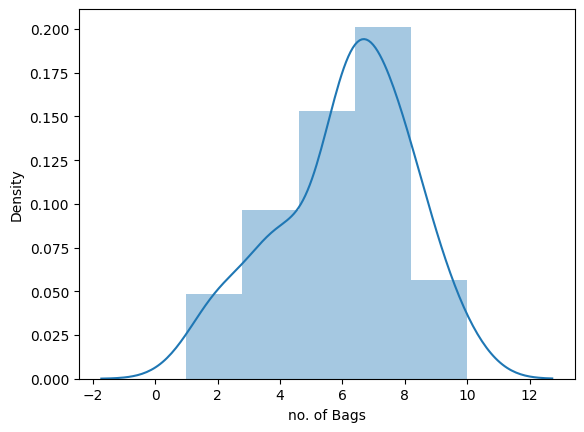

In [ ]:
sns.distplot(data[ 'no. of Bags'])

In [ ]:
data.columns

Index(['Age (Yrs)', 'Sex', 'House-Head', 'Household people', 'Lev. Edu',
       'N_maize_F', 'Annual Income (GHC)', 'no. of Bags', 'Fertilizer'],
      dtype='object')

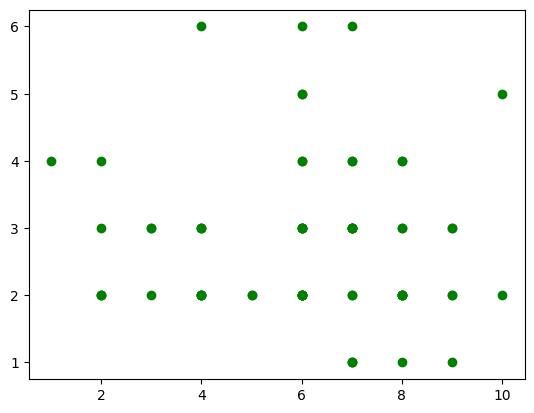

In [ ]:
plt.scatter(data['no. of Bags'],data['N_maize_F'],color='g') 

#plt.plot(X_test, y_pred,color='k') 



plt.show()

In [ ]:
data.columns

Index(['Age (Yrs)', 'Sex', 'House-Head', 'Household people', 'Lev. Edu',
       'N_maize_F', 'Annual Income (GHC)', 'no. of Bags', 'Fertilizer'],
      dtype='object')

## Insights/Exploratory Data Analysis(EDA) on Sex

In [ ]:
#check the unique values in employment
data['Sex'].unique()

array(['female', 'male'], dtype=object)

<Axes: xlabel='Annual Income (GHC)', ylabel='Density'>

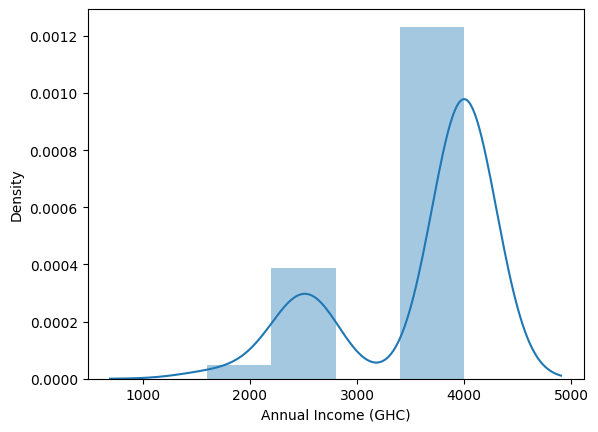

In [ ]:

sns.distplot(data[ 'Annual Income (GHC)'])

In [ ]:
#employment grouping percentages
employment=data['Sex'].value_counts()
employment2=employment.index
number_of_customers=employment.values
figure=px.pie(data,values=number_of_customers,names=employment2,hole=0.5,
 title='Years of Eployment')
figure.show()

In [ ]:
data.groupby('Fertilizer')['Sex'].value_counts(normalize=True)*100

Fertilizer  Sex   
no          female    50.00000
            male      50.00000
yes         male      70.27027
            female    29.72973
Name: Sex, dtype: float64

<Axes: xlabel='Fertilizer', ylabel='count'>

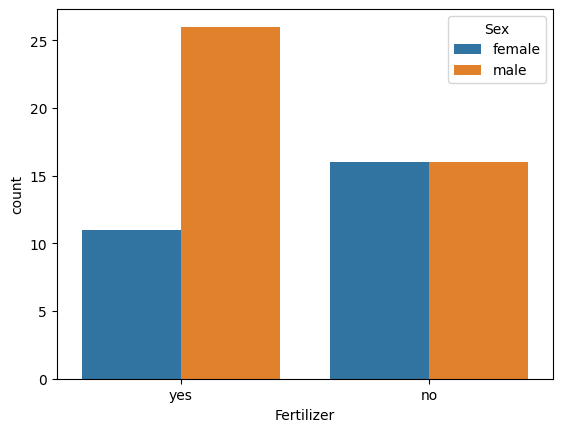

In [ ]:
sns.countplot(x='Fertilizer',hue='Sex',data=data)

In [ ]:
data.groupby('Sex')['Age (Yrs)'].value_counts(normalize=True)*100

Sex     Age (Yrs)
female  41-50        40.740741
        51-60        25.925926
        31-40        14.814815
        > 60         11.111111
        20-30         7.407407
male    41-50        33.333333
        > 60         26.190476
        51-60        21.428571
        20-30         9.523810
        31-40         9.523810
Name: Age (Yrs), dtype: float64

<Axes: xlabel='Age (Yrs)', ylabel='count'>

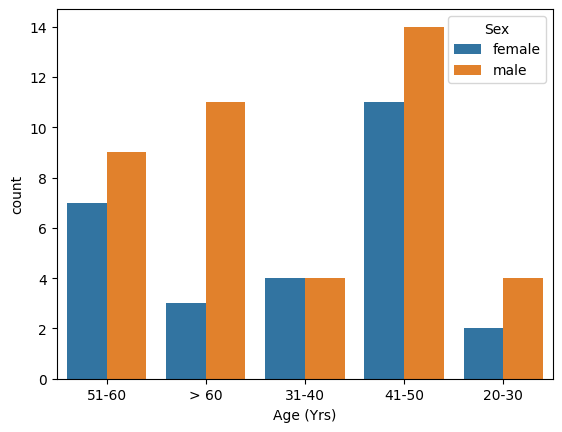

In [ ]:
sns.countplot(x='Age (Yrs)',hue='Sex',data=data)

In [ ]:
data.groupby('Sex')['House-Head'].value_counts(normalize=True)*100

Sex     House-Head
female  yes           62.962963
        no            37.037037
male    yes           66.666667
        no            33.333333
Name: House-Head, dtype: float64

<Axes: xlabel='House-Head', ylabel='count'>

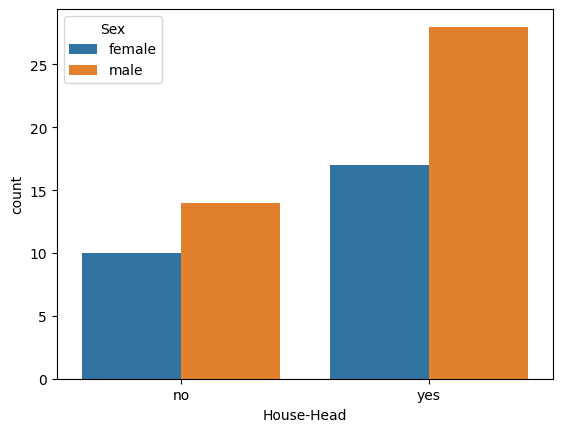

In [ ]:
sns.countplot(x='House-Head',hue='Sex',data=data)

In [ ]:
data.groupby('Lev. Edu')['Sex'].value_counts(normalize=True)*100

Lev. Edu    Sex   
JHS/Middle  male       70.588235
            female     29.411765
Primary     female     60.000000
            male       40.000000
SHS         female     54.545455
            male       45.454545
Vocational  male      100.000000
no Formal   male       52.941176
            female     47.058824
Name: Sex, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

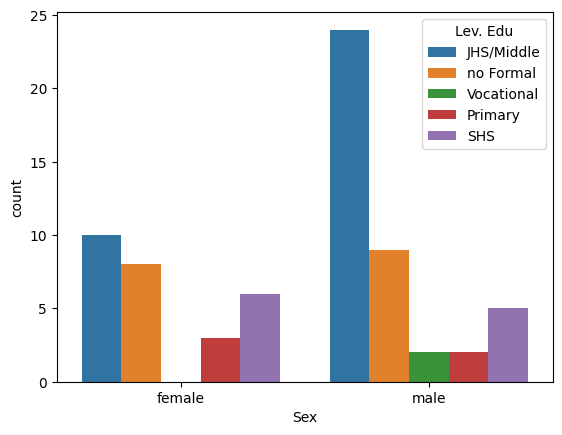

In [ ]:
sns.countplot(x='Sex',hue='Lev. Edu',data=data)

In [ ]:
data.groupby('Sex')['Household people'].value_counts(normalize=True)*100

Sex     Household people
female  6-10                66.666667
        1-5                 18.518519
        > 10                14.814815
male    6-10                47.619048
        1-5                 30.952381
        > 10                21.428571
Name: Household people, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

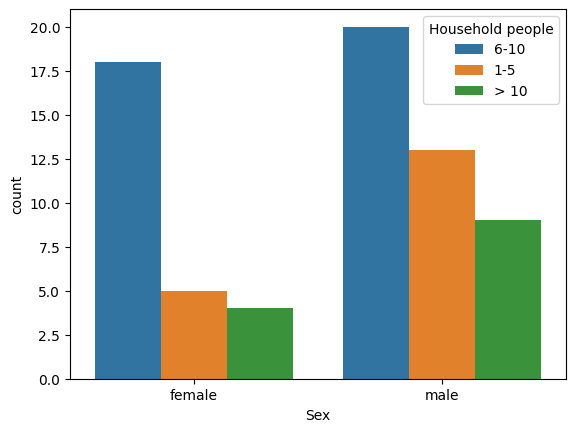

In [ ]:
sns.countplot(x='Sex',hue='Household people',data=data)

In [ ]:
data.columns

Index(['Age (Yrs)', 'Sex', 'House-Head', 'Household people', 'Lev. Edu',
       'N_maize_F', 'Annual Income (GHC)', 'no. of Bags', 'Fertilizer'],
      dtype='object')

In [ ]:
data=pd.read_excel('/content/maize_production1.xlsx')
data

,Age (Yrs),Sex,House-Head,Household people,Lev. Edu,N_maize_F,Annual Income (GHC),1. of Bags,Fertilizer
0,1,1,1,1,1,4,4000,7,2
1,2,2,2,1,1,3,4000,7,2
2,3,1,1,1,1,3,4000,3,1
3,2,1,1,1,2,3,4000,4,1
4,1,2,2,1,3,2,4000,8,2
...,...,...,...,...,...,...,...,...,...
64,2,2,2,3,2,2,2600,9,2
65,3,1,1,2,2,4,4000,6,1
66,2,2,1,2,1,2,4000,7,2
67,1,2,2,3,1,3,2500,6,1


In [ ]:
#fit multiple regression model
from sklearn import linear_model
import statsmodels.api as sm


x = data[['Age (Yrs)', 'Sex', 'House-Head', 'Household people', 'Lev. Edu',
       'N_maize_F','1. of Bags', 'Fertilizer']]
y = data['Annual Income (GHC)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2774.421880577127
Coefficients: 
 [ 64.64598162  -4.80697735 -29.26872258 -42.39007305 -62.09038104
  68.98482614  77.97643723 147.98227077]
                             OLS Regression Results                            
Dep. Variable:     Annual Income (GHC)   R-squared:                       0.118
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.004
Date:                 Thu, 06 Apr 2023   Prob (F-statistic):              0.443
Time:                         04:48:49   Log-Likelihood:                -545.35
No. Observations:                   69   AIC:                             1109.
Df Residuals:                       60   BIC:                             1129.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                       coef    std err        

In [ ]:
vif_df = pd.DataFrame()
vif_df["feature"] = x.columns
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
 
#Print the dataframe with VIF values 
print(vif_df)



            feature        VIF
0             const  63.931987
1         Age (Yrs)   1.103048
2               Sex   1.210138
3        House-Head   1.099950
4  Household people   1.088673
5          Lev. Edu   1.088429
6         N_maize_F   1.053079
7        1. of Bags   1.095815
8        Fertilizer   1.080309


In [ ]:
#fit multiple regression model
from sklearn import linear_model
import statsmodels.api as sm


x = data[['Age (Yrs)', 'Sex', 'House-Head', 'Household people', 'Lev. Edu',
       'N_maize_F', 'Fertilizer']]
y = data['Annual Income (GHC)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 3186.9102363992642
Coefficients: 
 [ 77.30876658  55.08751278 -21.50762739 -27.22973002 -78.1224251
  64.6607625  107.29225448]
                             OLS Regression Results                            
Dep. Variable:     Annual Income (GHC)   R-squared:                       0.068
Model:                             OLS   Adj. R-squared:                 -0.039
Method:                  Least Squares   F-statistic:                    0.6324
Date:                 Thu, 06 Apr 2023   Prob (F-statistic):              0.727
Time:                         04:14:31   Log-Likelihood:                -547.26
No. Observations:                   69   AIC:                             1111.
Df Residuals:                       61   BIC:                             1128.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t

In [ ]:
#fit multiple regression model
from sklearn import linear_model
import statsmodels.api as sm


x = data[['Age (Yrs)', 'Sex', 
       'N_maize_F','1. of Bags', 'Fertilizer']]
y = data['Annual Income (GHC)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2437.7701506924823
Coefficients: 
 [ 58.2715054   12.23717904  75.19168763  83.04004704 166.43757183]
                             OLS Regression Results                            
Dep. Variable:     Annual Income (GHC)   R-squared:                       0.099
Model:                             OLS   Adj. R-squared:                  0.028
Method:                  Least Squares   F-statistic:                     1.390
Date:                 Thu, 06 Apr 2023   Prob (F-statistic):              0.240
Time:                         04:15:30   Log-Likelihood:                -546.07
No. Observations:                   69   AIC:                             1104.
Df Residuals:                       63   BIC:                             1118.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [ ]:
#fit multiple regression model
from sklearn import linear_model
import statsmodels.api as sm


x = data[['Sex', 'N_maize_F','1. of Bags', 'Fertilizer']]
y = data['Annual Income (GHC)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2608.446368461745
Coefficients: 
 [  0.63258157  70.24390964  86.32337426 172.27267422]
                             OLS Regression Results                            
Dep. Variable:     Annual Income (GHC)   R-squared:                       0.087
Model:                             OLS   Adj. R-squared:                  0.030
Method:                  Least Squares   F-statistic:                     1.521
Date:                 Thu, 06 Apr 2023   Prob (F-statistic):              0.207
Time:                         04:16:26   Log-Likelihood:                -546.55
No. Observations:                   69   AIC:                             1103.
Df Residuals:                       64   BIC:                             1114.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------